# Classification with K-nn and Decision Trees

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Exploring E.coli Dataset


The dataset describes the problem of classifying [E.coli proteins](https://en.wikipedia.org/wiki/Escherichia_coli) using their amino acid sequences in their cell localization sites. That is, predicting how a protein will bind to a cell based on the chemical composition of the protein before it is folded.


The dataset is comprised of 336 examples of E.coli proteins and each example is described using seven input variables calculated from the proteins amino acid sequence.

<p>
    <img src="https://i.la-croix.com/1400x933/smart/2022/03/31/1201207976/bacterie-Escherichia-reside-digestif-lhomme-animaux-chaud_0.jpg" width=500>
</p>


### Attribute Information

1. *mcg*: McGeoch's method for signal sequence recognition.
2. *gvh*: von Heijne's method for signal sequence recognition.
3. *lip*: von Heijne's Signal Peptidase II consensus sequence score.
4. *chg*: Presence of charge on N-terminus of predicted lipoproteins.
5. *aac*: score of discriminant analysis of the amino acid content of outer membrane and periplasmic proteins.
6. *alm1*: score of the ALOM membrane spanning region prediction program.
7. *alm2*: score of ALOM program after excluding putative cleavable signal regions from the sequence.

### Class Distribution.

There are eight classes described as follows:

- **cp**  (cytoplasm)                                  
- **im**  (inner membrane without signal sequence)                  
- **pp**  (perisplasm)                                  
- **imU** (inner membrane, uncleavable signal sequence)
- **om**  (outer membrane)                               
- **omL** (outer membrane lipoprotein)                   
- **imL** (inner membrane lipoprotein)                   
- **imS** (inner membrane, cleavable signal sequence)    



In [ ]:
# Loading the dataset
import pandas as pd

names = ["Sequence Name", "mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2", "location"]
ecoli = pd.read_csv("/content/drive/MyDrive/ML/Class 1 - EDA/Datasets/ecoli.data",names=names)

In [ ]:
# Drop 2 columns: Sequence name and chg because they do not contain generalizable info for modelling
ecoli = ecoli.drop(columns=["Sequence Name", "chg"])



In [ ]:
# drop some classes where location = om or omL or imL or imS
ecoli = ecoli[~ecoli['location'].isin(['om', 'omL', 'imL', 'imS'])]


In [ ]:
ecoli.head(10)

,mcg,gvh,lip,aac,alm1,alm2,location
0,0.49,0.29,0.48,0.56,0.24,0.35,cp
1,0.07,0.40,0.48,0.54,0.35,0.44,cp
2,0.56,0.40,0.48,0.49,0.37,0.46,cp
3,0.59,0.49,0.48,0.52,0.45,0.36,cp
4,0.23,0.32,0.48,0.55,0.25,0.35,cp
5,0.67,0.39,0.48,0.36,0.38,0.46,cp
6,0.29,0.28,0.48,0.44,0.23,0.34,cp
7,0.21,0.34,0.48,0.51,0.28,0.39,cp
8,0.20,0.44,0.48,0.46,0.51,0.57,cp
9,0.42,0.40,0.48,0.56,0.18,0.30,cp


In [ ]:
# Dataset description
ecoli.describe()


,mcg,gvh,lip,aac,alm1,alm2
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,0.482573,0.486254,0.483388,0.483844,0.499739,0.515993
std,0.193564,0.141366,0.041902,0.107789,0.223112,0.206084
min,0.000000,0.160000,0.480000,0.000000,0.030000,0.000000
25%,0.335000,0.390000,0.480000,0.420000,0.320000,0.360000
50%,0.470000,0.460000,0.480000,0.480000,0.450000,0.440000
75%,0.640000,0.550000,0.480000,0.560000,0.715000,0.730000
max,0.890000,1.000000,1.000000,0.750000,1.000000,0.990000


In [ ]:
# Info
ecoli.info()


<class 'pandas.core.frame.DataFrame'>
Index: 307 entries, 0 to 335
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mcg       307 non-null    float64
 1   gvh       307 non-null    float64
 2   lip       307 non-null    float64
 3   aac       307 non-null    float64
 4   alm1      307 non-null    float64
 5   alm2      307 non-null    float64
 6   location  307 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.2+ KB


**MODELLING**

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , confusion_matrix, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
X= ecoli.drop(["location"], axis=1)
y= ecoli["location"] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# USE DEFAULT (K = 5)
### Evaluate the accuracy of the model for K=5
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
print("Accuracy for K=5 : ", knn.score(X_test, y_test))

Accuracy for K=5 :  0.8548387096774194


In [ ]:
# GRIDSEARCHCV
#creat a new KNN model
from sklearn.model_selection import GridSearchCV
Knn2 = KNeighborsClassifier()
K_range = list(range(2,15))
pram_grid = dict(n_neighbors = K_range)
grid = GridSearchCV(Knn2, pram_grid, cv = 10, scoring = 'accuracy')
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8808333333333334
{'n_neighbors': 4}
KNeighborsClassifier(n_neighbors=4)


In [ ]:
### Evaluate the accuracy of the GRIDSEARCHCV model
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
print("Accuracy for GRIDSEARCH : ", knn.score(X_test, y_test))

Accuracy for GRIDSEARCH :  0.8387096774193549


**COMBINE PCA WITH KNN**

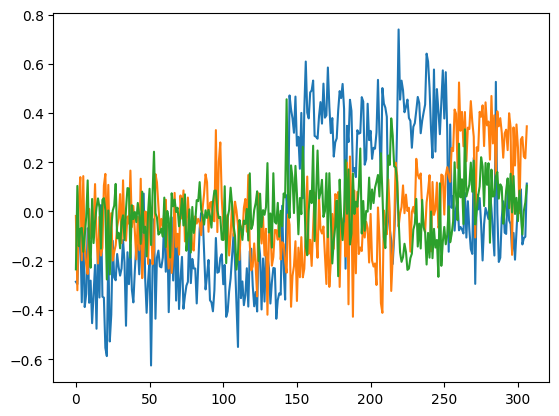

In [ ]:
import matplotlib.pyplot as plt

# Principal component Analysis WITH 3 COMPONENTS
from sklearn import decomposition
pca = decomposition.PCA(n_components = 3)
X= ecoli.drop(["location"], axis=1)
pca.fit(X)
X = pca.transform(X)
df = pd.DataFrame(data = X , columns=["pc1","pc2", "pc3"])
plt.plot(X);

In [ ]:
y= ecoli["location"] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0, train_size= 0.75)

In [ ]:
# USE DEFAULT (K = 5)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
print("Accuracy for K=5 : ", knn.score(X_test, y_test))

Accuracy for K=5 :  0.8311688311688312
